# Project

### Import Modules

In [44]:
import tensorflow as tf
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

### Loading Datasets

In [45]:
FILENAME= "calendar.csv"
DATADIR = "../pfda_project/"

calendar_df = pd.read_csv(DATADIR + FILENAME, header=0)

In [46]:
FILENAME= "inventory.csv"
DATADIR = "../pfda_project/"

inventory_df = pd.read_csv(DATADIR + FILENAME, header=0)

In [47]:
FILENAME= "sales_test.csv"
DATADIR = "../pfda_project/"

sales_test_df = pd.read_csv(DATADIR + FILENAME, header=0)

In [48]:
FILENAME= "sales_train.csv"
DATADIR = "../pfda_project/"

sales_train_df = pd.read_csv(DATADIR + FILENAME, low_memory=False)

In [49]:
FILENAME= "solution.csv"
DATADIR = "../pfda_project/"

solution_df = pd.read_csv(DATADIR + FILENAME)

In [50]:
FILENAME= "test_weights.csv"
DATADIR = "../pfda_project/"

test_weights_df = pd.read_csv(DATADIR + FILENAME)

### Information about datasets

##### calendar_df

In [51]:
calendar_df.head()

,date,holiday_name,holiday,shops_closed,winter_school_holidays,school_holidays,warehouse
0,2022-03-16,NaN,0,0,0,0,Frankfurt_1
1,2020-03-22,NaN,0,0,0,0,Frankfurt_1
2,2018-02-07,NaN,0,0,0,0,Frankfurt_1
3,2018-08-10,NaN,0,0,0,0,Frankfurt_1
4,2017-10-26,NaN,0,0,0,0,Prague_2


In [52]:
calendar_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23016 entries, 0 to 23015
Data columns (total 7 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   date                    23016 non-null  object
 1   holiday_name            930 non-null    object
 2   holiday                 23016 non-null  int64 
 3   shops_closed            23016 non-null  int64 
 4   winter_school_holidays  23016 non-null  int64 
 5   school_holidays         23016 non-null  int64 
 6   warehouse               23016 non-null  object
dtypes: int64(4), object(3)
memory usage: 1.2+ MB


The earliest date in dataset

In [53]:
calendar_df.date.min()

'2016-01-01'

The latest date in dataset

In [54]:
calendar_df.date.max()

'2024-12-31'

##### inventory_df

In [55]:
inventory_df.head()

,unique_id,product_unique_id,name,L1_category_name_en,L2_category_name_en,L3_category_name_en,L4_category_name_en,warehouse
0,5255,2583,Pastry_196,Bakery,Bakery_L2_14,Bakery_L3_26,Bakery_L4_1,Prague_3
1,4948,2426,Herb_19,Fruit and vegetable,Fruit and vegetable_L2_30,Fruit and vegetable_L3_86,Fruit and vegetable_L4_1,Prague_3
2,2146,1079,Beet_2,Fruit and vegetable,Fruit and vegetable_L2_3,Fruit and vegetable_L3_65,Fruit and vegetable_L4_34,Prague_1
3,501,260,Chicken_13,Meat and fish,Meat and fish_L2_13,Meat and fish_L3_27,Meat and fish_L4_5,Prague_1
4,4461,2197,Chicory_1,Fruit and vegetable,Fruit and vegetable_L2_17,Fruit and vegetable_L3_33,Fruit and vegetable_L4_1,Frankfurt_1


In [56]:
inventory_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5432 entries, 0 to 5431
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   unique_id            5432 non-null   int64 
 1   product_unique_id    5432 non-null   int64 
 2   name                 5432 non-null   object
 3   L1_category_name_en  5432 non-null   object
 4   L2_category_name_en  5432 non-null   object
 5   L3_category_name_en  5432 non-null   object
 6   L4_category_name_en  5432 non-null   object
 7   warehouse            5432 non-null   object
dtypes: int64(2), object(6)
memory usage: 339.6+ KB


#### sales_test_df

In [57]:
sales_train_df.head()

,unique_id,date,warehouse,total_orders,sales,sell_price_main,availability,type_0_discount,type_1_discount,type_2_discount,type_3_discount,type_4_discount,type_5_discount,type_6_discount
0,4845,2024-03-10,Budapest_1,6436.0,16.34,646.26,1.00,0.00000,0.0,0.0,0.0,0.15312,0.0,0.0
1,4845,2021-05-25,Budapest_1,4663.0,12.63,455.96,1.00,0.00000,0.0,0.0,0.0,0.15025,0.0,0.0
2,4845,2021-12-20,Budapest_1,6507.0,34.55,455.96,1.00,0.00000,0.0,0.0,0.0,0.15025,0.0,0.0
3,4845,2023-04-29,Budapest_1,5463.0,34.52,646.26,0.96,0.20024,0.0,0.0,0.0,0.15312,0.0,0.0
4,4845,2022-04-01,Budapest_1,5997.0,35.92,486.41,1.00,0.00000,0.0,0.0,0.0,0.15649,0.0,0.0


In [58]:
sales_train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 14 columns):
 #   Column           Non-Null Count    Dtype  
---  ------           --------------    -----  
 0   unique_id        1048575 non-null  int64  
 1   date             1048575 non-null  object 
 2   warehouse        1048575 non-null  object 
 3   total_orders     1048556 non-null  float64
 4   sales            1048556 non-null  float64
 5   sell_price_main  1048575 non-null  float64
 6   availability     1048575 non-null  float64
 7   type_0_discount  1048575 non-null  float64
 8   type_1_discount  1048575 non-null  float64
 9   type_2_discount  1048575 non-null  float64
 10  type_3_discount  1048575 non-null  float64
 11  type_4_discount  1048575 non-null  float64
 12  type_5_discount  1048575 non-null  float64
 13  type_6_discount  1048575 non-null  float64
dtypes: float64(11), int64(1), object(2)
memory usage: 112.0+ MB


The earliest date in dataset

In [59]:
sales_train_df.date.min()

'2020-08-01'

The latest date in dataset

In [60]:
sales_train_df.date.max()

'2024-06-02'

#### sales_test_df

In [61]:
sales_test_df.head(15)

,unique_id,date,warehouse,total_orders,sell_price_main,type_0_discount,type_1_discount,type_2_discount,type_3_discount,type_4_discount,type_5_discount,type_6_discount
0,1226,2024-06-03,Brno_1,8679.0,13.13,0.00000,0.0,0.0,0.0,0.0,0.0,0.0
1,1226,2024-06-11,Brno_1,8795.0,13.13,0.15873,0.0,0.0,0.0,0.0,0.0,0.0
2,1226,2024-06-13,Brno_1,10009.0,13.13,0.15873,0.0,0.0,0.0,0.0,0.0,0.0
3,1226,2024-06-15,Brno_1,8482.0,13.13,0.15873,0.0,0.0,0.0,0.0,0.0,0.0
4,1226,2024-06-09,Brno_1,8195.0,13.13,0.00000,0.0,0.0,0.0,0.0,0.0,0.0
5,1226,2024-06-06,Brno_1,9538.0,13.13,0.00000,0.0,0.0,0.0,0.0,0.0,0.0
6,1226,2024-06-12,Brno_1,9002.0,13.13,0.15873,0.0,0.0,0.0,0.0,0.0,0.0
7,1226,2024-06-05,Brno_1,8501.0,13.13,0.00000,0.0,0.0,0.0,0.0,0.0,0.0
8,1226,2024-06-04,Brno_1,8492.0,13.13,0.00000,0.0,0.0,0.0,0.0,0.0,0.0
9,1226,2024-06-08,Brno_1,8093.0,13.13,0.00000,0.0,0.0,0.0,0.0,0.0,0.0


In [62]:
sales_test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47021 entries, 0 to 47020
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   unique_id        47021 non-null  int64  
 1   date             47021 non-null  object 
 2   warehouse        47021 non-null  object 
 3   total_orders     47021 non-null  float64
 4   sell_price_main  47021 non-null  float64
 5   type_0_discount  47021 non-null  float64
 6   type_1_discount  47021 non-null  float64
 7   type_2_discount  47021 non-null  float64
 8   type_3_discount  47021 non-null  float64
 9   type_4_discount  47021 non-null  float64
 10  type_5_discount  47021 non-null  float64
 11  type_6_discount  47021 non-null  float64
dtypes: float64(9), int64(1), object(2)
memory usage: 4.3+ MB


The earliest date in dataset

In [63]:
sales_test_df.date.min()

'2024-06-03'

The earliest date in dataset

In [64]:
sales_test_df.date.max()

'2024-06-16'

#### solution_df

In [65]:
solution_df.head(5)

,id,sales_hat
0,1226_2024-06-03,0
1,1226_2024-06-11,0
2,1226_2024-06-13,0
3,1226_2024-06-15,0
4,1226_2024-06-09,0


In [66]:
solution_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47021 entries, 0 to 47020
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   id         47021 non-null  object
 1   sales_hat  47021 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 734.8+ KB


#### test_weight_df

In [67]:
test_weights_df.head(5)

,unique_id,weight
0,0,2.535369
1,1,3.888933
2,2,5.885237
3,3,2.139552
4,5,3.021715


In [68]:
test_weights_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5390 entries, 0 to 5389
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   unique_id  5390 non-null   int64  
 1   weight     5390 non-null   float64
dtypes: float64(1), int64(1)
memory usage: 84.3 KB


### Data preprocessing

In [69]:
calendar_df['holiday_name'].value_counts()

Labour Day                                                     63
2nd Christmas Day                                              63
1st Christmas Day                                              63
International womens day                                       63
Christmas Eve                                                  63
New Years Day                                                  63
Easter Monday                                                  42
Good Friday                                                    42
Den boje za svobodu a demokracii                               36
Den vzniku samostatneho ceskoslovenskeho statu                 36
Jan Hus                                                        36
Den ceske statnosti                                            36
Den osvobozeni                                                 36
Cyrila a Metodej                                               36
Whit sunday                                                    27
Whit monda

Translation of some czech holidays

In [70]:
holidays_cz = {'Den boje za svobodu a demokracii': 'Struggle for Freedom and Democracy Day',
               'Den vzniku samostatneho ceskoslovenskeho statu' : 'Foundation of Independent Czechoslovakia', 
               'Jan Hus': 'Jan Hus Day',
               'Den ceske statnosti': 'St. Wenclaus Day',
               'Den osvobozeni': 'Victory Day',
               'Cyrila a Metodej': 'St. Cyril and Methodius Day'}
calendar_df['holiday_name'] = calendar_df['holiday_name'].map(holidays_cz)

#### Merging

In [71]:
data = sales_train_df.merge(calendar_df, on='date', how='left').merge(inventory_df, on='unique_id', how='left')

In [72]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7340025 entries, 0 to 7340024
Data columns (total 27 columns):
 #   Column                  Dtype  
---  ------                  -----  
 0   unique_id               int64  
 1   date                    object 
 2   warehouse_x             object 
 3   total_orders            float64
 4   sales                   float64
 5   sell_price_main         float64
 6   availability            float64
 7   type_0_discount         float64
 8   type_1_discount         float64
 9   type_2_discount         float64
 10  type_3_discount         float64
 11  type_4_discount         float64
 12  type_5_discount         float64
 13  type_6_discount         float64
 14  holiday_name            object 
 15  holiday                 int64  
 16  shops_closed            int64  
 17  winter_school_holidays  int64  
 18  school_holidays         int64  
 19  warehouse_y             object 
 20  product_unique_id       int64  
 21  name                    object 

Removing redundant columns

In [73]:
data=data.drop(columns='warehouse_y')
data=data.drop(columns='warehouse_x')

In [74]:
data.head(5)

,unique_id,date,total_orders,sales,sell_price_main,availability,type_0_discount,type_1_discount,type_2_discount,type_3_discount,...,shops_closed,winter_school_holidays,school_holidays,product_unique_id,name,L1_category_name_en,L2_category_name_en,L3_category_name_en,L4_category_name_en,warehouse
0,4845,2024-03-10,6436.0,16.34,646.26,1.0,0.0,0.0,0.0,0.0,...,0,0,0,2375,Croissant_35,Bakery,Bakery_L2_18,Bakery_L3_83,Bakery_L4_1,Budapest_1
1,4845,2024-03-10,6436.0,16.34,646.26,1.0,0.0,0.0,0.0,0.0,...,0,0,0,2375,Croissant_35,Bakery,Bakery_L2_18,Bakery_L3_83,Bakery_L4_1,Budapest_1
2,4845,2024-03-10,6436.0,16.34,646.26,1.0,0.0,0.0,0.0,0.0,...,0,0,0,2375,Croissant_35,Bakery,Bakery_L2_18,Bakery_L3_83,Bakery_L4_1,Budapest_1
3,4845,2024-03-10,6436.0,16.34,646.26,1.0,0.0,0.0,0.0,0.0,...,0,0,0,2375,Croissant_35,Bakery,Bakery_L2_18,Bakery_L3_83,Bakery_L4_1,Budapest_1
4,4845,2024-03-10,6436.0,16.34,646.26,1.0,0.0,0.0,0.0,0.0,...,0,0,0,2375,Croissant_35,Bakery,Bakery_L2_18,Bakery_L3_83,Bakery_L4_1,Budapest_1


#### Date engineering

In [75]:
data['day_of_week'] = pd.to_datetime(data['date']).dt.dayofweek
data['weekend'] = data['day_of_week'].isin([5, 6]).astype(int)
data['holiday'] = data['holiday'].fillna(0).astype(int)

In [76]:
# Rolling
data['rolling_mean_7'] = data.groupby('unique_id')['sales'].shift(1).rolling(window=7).mean()

In [77]:
#Drop rows with NaN values after featue engineering
data_train = data.dropna()

In [78]:
for lag in [1, 7, 30]:
    data[f'sales_lag_{lag}'] = data.groupby('unique_id')['sales'].shift(lag)

In [79]:
data_train.head(5)

,unique_id,date,total_orders,sales,sell_price_main,availability,type_0_discount,type_1_discount,type_2_discount,type_3_discount,...,product_unique_id,name,L1_category_name_en,L2_category_name_en,L3_category_name_en,L4_category_name_en,warehouse,day_of_week,weekend,rolling_mean_7
798,4845,2021-07-06,4502.0,13.41,455.96,1.0,0.0,0.0,0.0,0.0,...,2375,Croissant_35,Bakery,Bakery_L2_18,Bakery_L3_83,Bakery_L4_1,Budapest_1,1,0,16.480000
800,4845,2021-07-06,4502.0,13.41,455.96,1.0,0.0,0.0,0.0,0.0,...,2375,Croissant_35,Bakery,Bakery_L2_18,Bakery_L3_83,Bakery_L4_1,Budapest_1,1,0,15.602857
802,4845,2021-07-06,4502.0,13.41,455.96,1.0,0.0,0.0,0.0,0.0,...,2375,Croissant_35,Bakery,Bakery_L2_18,Bakery_L3_83,Bakery_L4_1,Budapest_1,1,0,14.725714
804,4845,2021-07-06,4502.0,13.41,455.96,1.0,0.0,0.0,0.0,0.0,...,2375,Croissant_35,Bakery,Bakery_L2_18,Bakery_L3_83,Bakery_L4_1,Budapest_1,1,0,13.848571
1274,4845,2024-05-08,6866.0,27.98,646.26,1.0,0.0,0.0,0.0,0.0,...,2375,Croissant_35,Bakery,Bakery_L2_18,Bakery_L3_83,Bakery_L4_1,Budapest_1,2,0,3.890000


### Explanatory Data Analysis

In [80]:
#sales_train_df['date'] = pd.to_datetime(sales_train_df['date'])
#calendar_df['date'] = pd.to_datetime(calendar_df['date'])
sales_calendar = sales_train_df.merge(calendar_df, on='date', how='left')


In [81]:
sales_calendar.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7340025 entries, 0 to 7340024
Data columns (total 20 columns):
 #   Column                  Dtype  
---  ------                  -----  
 0   unique_id               int64  
 1   date                    object 
 2   warehouse_x             object 
 3   total_orders            float64
 4   sales                   float64
 5   sell_price_main         float64
 6   availability            float64
 7   type_0_discount         float64
 8   type_1_discount         float64
 9   type_2_discount         float64
 10  type_3_discount         float64
 11  type_4_discount         float64
 12  type_5_discount         float64
 13  type_6_discount         float64
 14  holiday_name            object 
 15  holiday                 int64  
 16  shops_closed            int64  
 17  winter_school_holidays  int64  
 18  school_holidays         int64  
 19  warehouse_y             object 
dtypes: float64(11), int64(5), object(4)
memory usage: 1.1+ GB


In [82]:
sales_calendar=sales_calendar.drop(columns='warehouse_y')
sales_calendar=sales_calendar.rename(columns={'warehouse_x':"warehouse"})

In [84]:
sales_calendar=pd.to_datetime()

TypeError: to_datetime() missing 1 required positional argument: 'arg'

In [ ]:
resampled_sales_calendar.head()

,unique_id,total_orders,sales,sell_price_main,availability,type_0_discount,type_1_discount,type_2_discount,type_3_discount,type_4_discount,type_5_discount,type_6_discount,holiday,shops_closed,winter_school_holidays,school_holidays,day_of_week,weekend
date,,,,,,,,,,,,,,,,,,
2020-08-31,333046182,456202901.0,12149643.38,14541679.39,101725.05,794.16960,0.0,55.26997,0.0,332.17415,0.0,2907.28074,2179,1073,0,0,362712,38031
2020-09-30,332663758,510238337.0,13527530.45,14725457.46,102701.34,904.55554,0.0,0.00000,0.0,318.96270,0.0,2552.66662,2204,2204,0,0,340956,31171
2020-10-31,345855993,612725533.0,17377818.29,16328686.22,107912.84,1034.59769,0.0,13.48627,0.0,328.54304,0.0,3859.10875,4518,3949,0,0,380268,35595
2020-11-30,341989536,671765157.0,18013965.90,16799005.79,104919.71,1043.88536,0.0,2.94119,0.0,316.85829,0.0,3308.15471,3424,1088,0,0,366009,36344
2020-12-31,351383473,690330270.0,17786316.73,17505622.96,109865.28,784.75628,0.0,17.64714,0.0,312.65311,0.0,3105.52438,10878,6909,0,0,364189,32354


In [ ]:
#days = {0: 'Monday', 1: 'Tuesday', 2: 'Wednesday', 3: 'Thursday', 4: 'Friday', 5: 'Saturday', 6: 'Sunday'}
#daily_sales['day_of_week'] = daily_sales['day_of_week'].map(days)

In [ ]:
# plt.figure(figsize=(12, 8))
# sns.barplot(data=daily_sales, x='day_of_week', y='sales', order=['Monday', 'Tuesday','Wednesday','Thursday','Friday', 'Saturday', 'Sunday']).set_title('Sales during days of week - summary')

In [ ]:
prague_1_filter = 'Prague_1'
prague_1_df = sales_calendar[sales_calendar['warehouse'] == prague_1_filter]
prague_2_filter = 'Prague_2'
prague_2_df = sales_calendar[sales_calendar['warehouse'] == prague_2_filter]
prague_3_filter = 'Prague_3'
prague_3_df = sales_calendar[sales_calendar['warehouse'] == prague_3_filter]
brno_1_filter = 'Brno_1'
brno_1_df = sales_calendar[sales_calendar['warehouse'] == brno_1_filter]
budapest_1_filter = 'Budapest_1'
budapest_1_df = sales_calendar[sales_calendar['warehouse'] == budapest_1_filter]
munich_1_filter = 'Munich_1'
munich_1_df = sales_calendar[sales_calendar['warehouse'] == munich_1_filter]
frankfurt_1_filter='Frankfurt_1'
frankfurt_1_df= sales_calendar[sales_calendar['warehouse'] == frankfurt_1_filter]

In [ ]:
prague_1_resampled=prague_1_df.resample('1d').sum(numeric_only=True)

Text(0.5, 1.0, 'Prague_1 warehouse daily summary sales over recorded period')

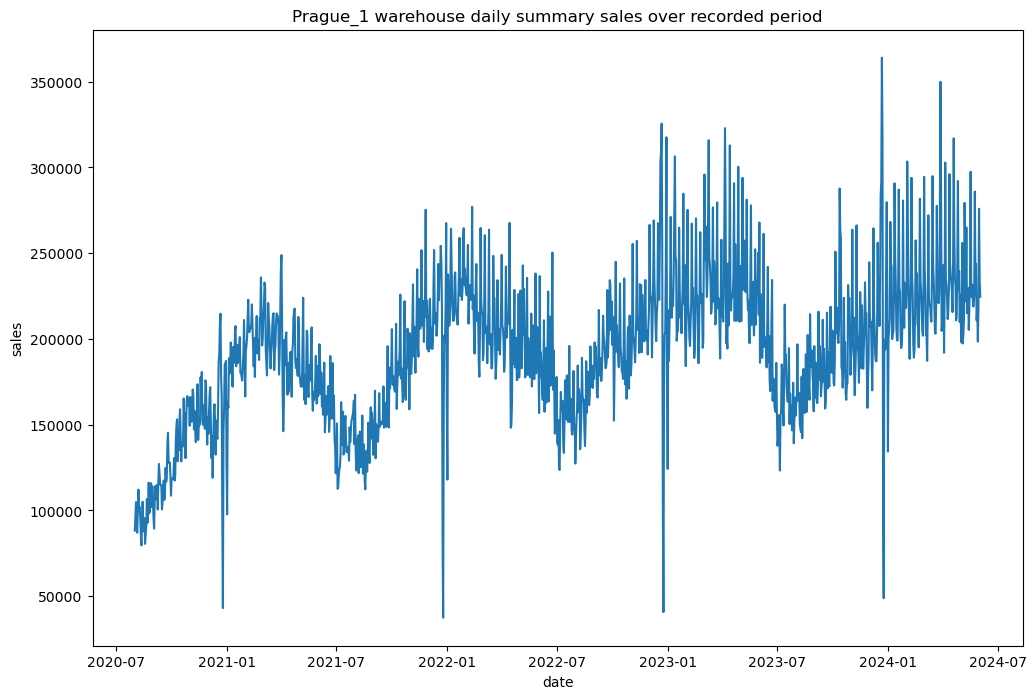

In [ ]:
plt.figure(figsize=(12, 8))
sns.lineplot(data=prague_1_resampled, x=prague_1_resampled.index, y='sales').set_title('Prague_1 warehouse daily summary sales over recorded period')

In [ ]:
dateFrom = "2023-01-01 00:00:00"
dateTo = "2023-12-31 23:59:00"
prague_1_2023=prague_1_df.loc[dateFrom:dateTo]
prague_1_2023_resampled=prague_1_2023.resample('1d').sum(numeric_only=True)

Text(0.5, 1.0, 'Prague_1 warehouse weekly summary sales 2023')

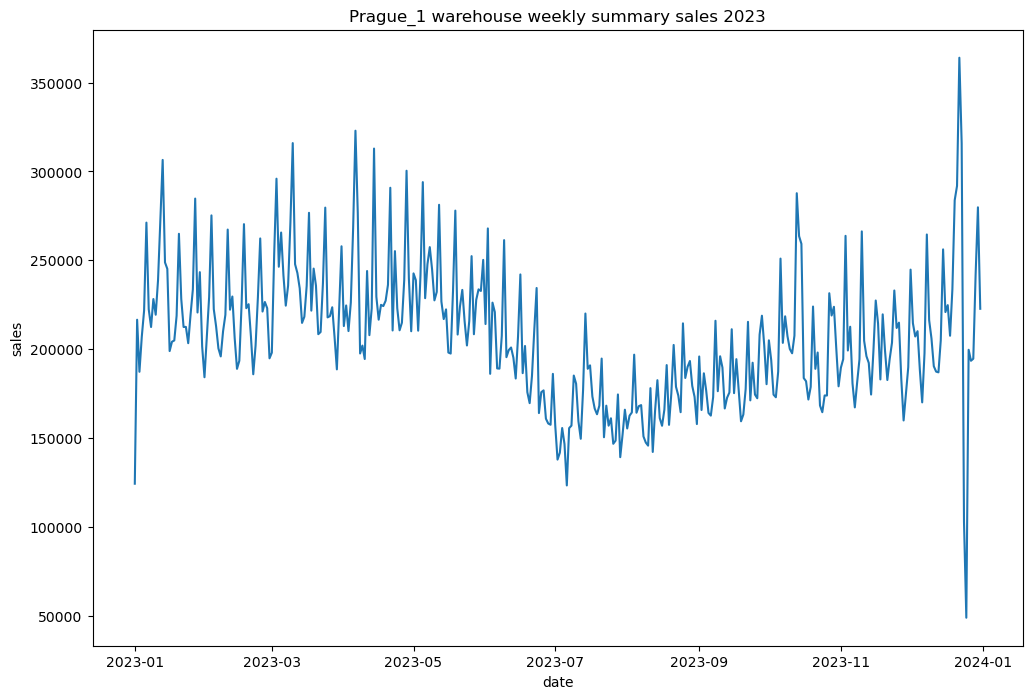

In [ ]:
plt.figure(figsize=(12, 8))
sns.lineplot(data=prague_1_2023_resampled, x=prague_1_2023_resampled.index, y='sales').set_title('Prague_1 warehouse daily summary sales 2023')